In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_frame = pd.read_csv("master_df.csv", encoding='ISO-8859-1')

In [9]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [22]:
# Filtering out dataframe to contain only the specified funding types
master_frame = master_frame[(master_frame.funding_round_type == 'seed') |
                            (master_frame.funding_round_type == 'venture') |
                            (master_frame.funding_round_type == 'angel') |
                            (master_frame.funding_round_type == 'private_equity')]

In [23]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75124 entries, 0 to 88528
Data columns (total 9 columns):
permalink                  75124 non-null object
name                       75123 non-null object
category_list              75124 non-null object
status                     75124 non-null object
country_code               75124 non-null object
funding_round_permalink    75124 non-null object
funding_round_type         75124 non-null object
funded_at                  75124 non-null object
raised_amount_usd          75124 non-null float64
dtypes: float64(1), object(8)
memory usage: 5.7+ MB


Now, we have to compute a **representative value of the funding amount** for each type of investment. We can either choose the mean or the median - let's have a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.

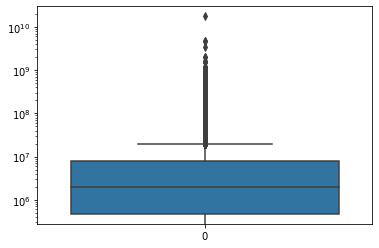

In [30]:
# Distribution of 'raised_amount_usd'
sns.boxplot(data=master_frame['raised_amount_usd'])
plt.yscale('log') # using 'log' to get clear information, else difficult to analysis with this data.
plt.show()

In [31]:
master_frame['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

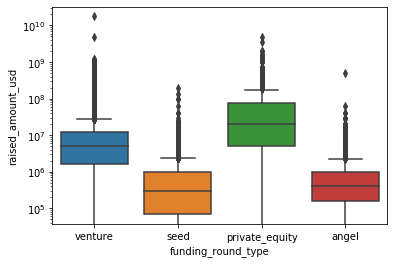

In [39]:
sns.boxplot(x=master_frame['funding_round_type'], y=master_frame['raised_amount_usd'], data=master_frame)
plt.yscale('log') # using 'log' to get clear information, else difficult to analysis with this data.
plt.show()

In [43]:
master_frame.loc[master_frame['funding_round_type'] == 'venture'].describe()

,raised_amount_usd
count,4.780900e+04
mean,1.172422e+07
std,8.821571e+07
min,0.000000e+00
25%,1.600000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [42]:
master_frame.loc[master_frame['funding_round_type'] == 'seed'].describe()

,raised_amount_usd
count,2.109500e+04
mean,7.477937e+05
std,2.288318e+06
min,0.000000e+00
25%,6.881650e+04
50%,3.000000e+05
75%,1.000000e+06
max,2.000000e+08


In [44]:
master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].describe()

,raised_amount_usd
count,1.820000e+03
mean,7.393849e+07
std,2.017765e+08
min,0.000000e+00
25%,5.000000e+06
50%,2.000000e+07
75%,7.576257e+07
max,4.745460e+09


In [46]:
master_frame.loc[master_frame['funding_round_type'] == 'angel'].describe()

,raised_amount_usd
count,4.400000e+03
mean,9.715739e+05
std,7.710904e+06
min,0.000000e+00
25%,1.527565e+05
50%,4.149060e+05
75%,1.000000e+06
max,4.945120e+08


In [48]:
# Comparing the median investment amount across the types
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Teclov's range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

In [51]:
# Saving the merged master frame for further analysis
master_frame.to_csv("master_df_FundingTypeAnalysis.csv", sep=',', index=False)